In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## EDA

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

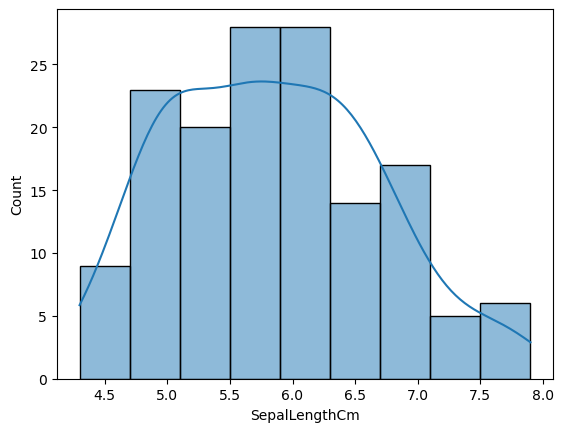

In [11]:
sns.histplot(df['SepalLengthCm'],kde=True)

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

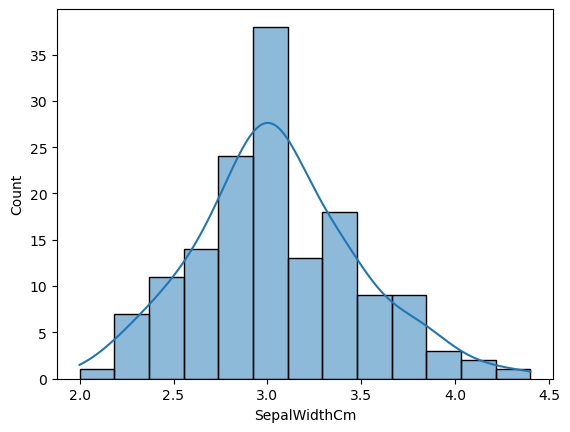

In [12]:
sns.histplot(df['SepalWidthCm'],kde=True)

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

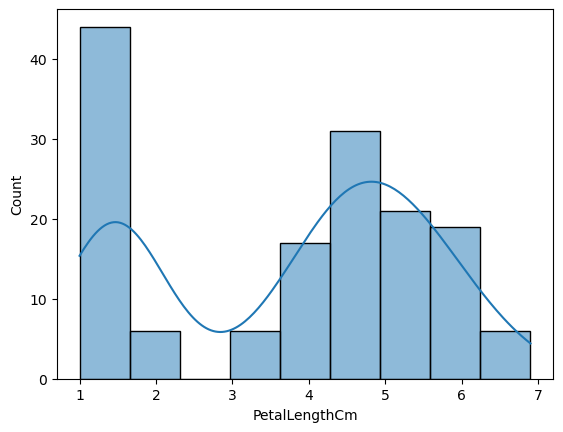

In [13]:
sns.histplot(df['PetalLengthCm'],kde=True)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

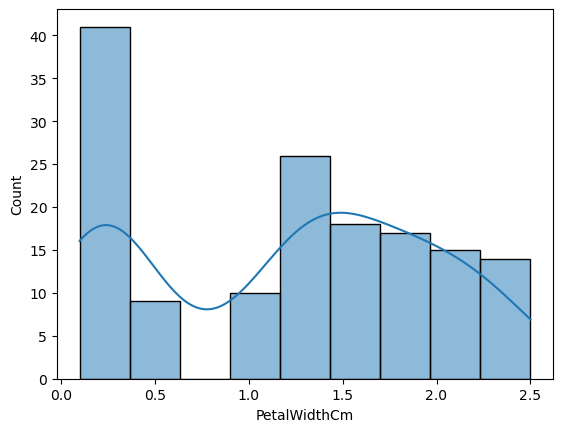

In [14]:
sns.histplot(df['PetalWidthCm'],kde=True)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

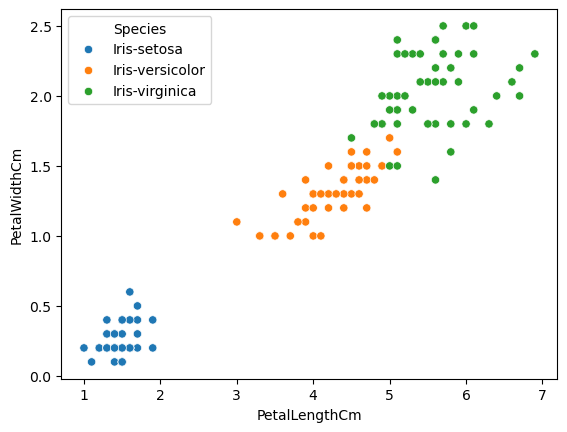

In [15]:
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue ='Species')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

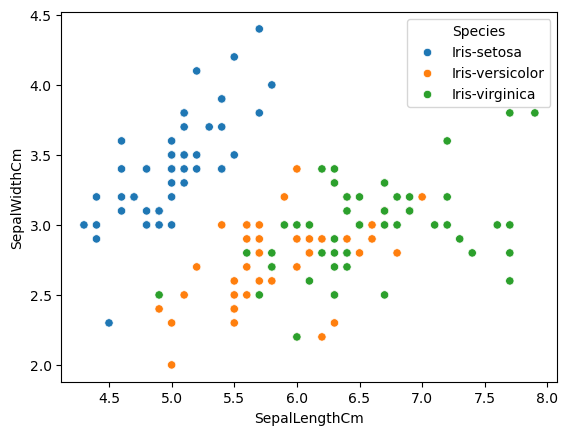

In [16]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')

In [17]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
df.drop('Id',axis=1,inplace=True)

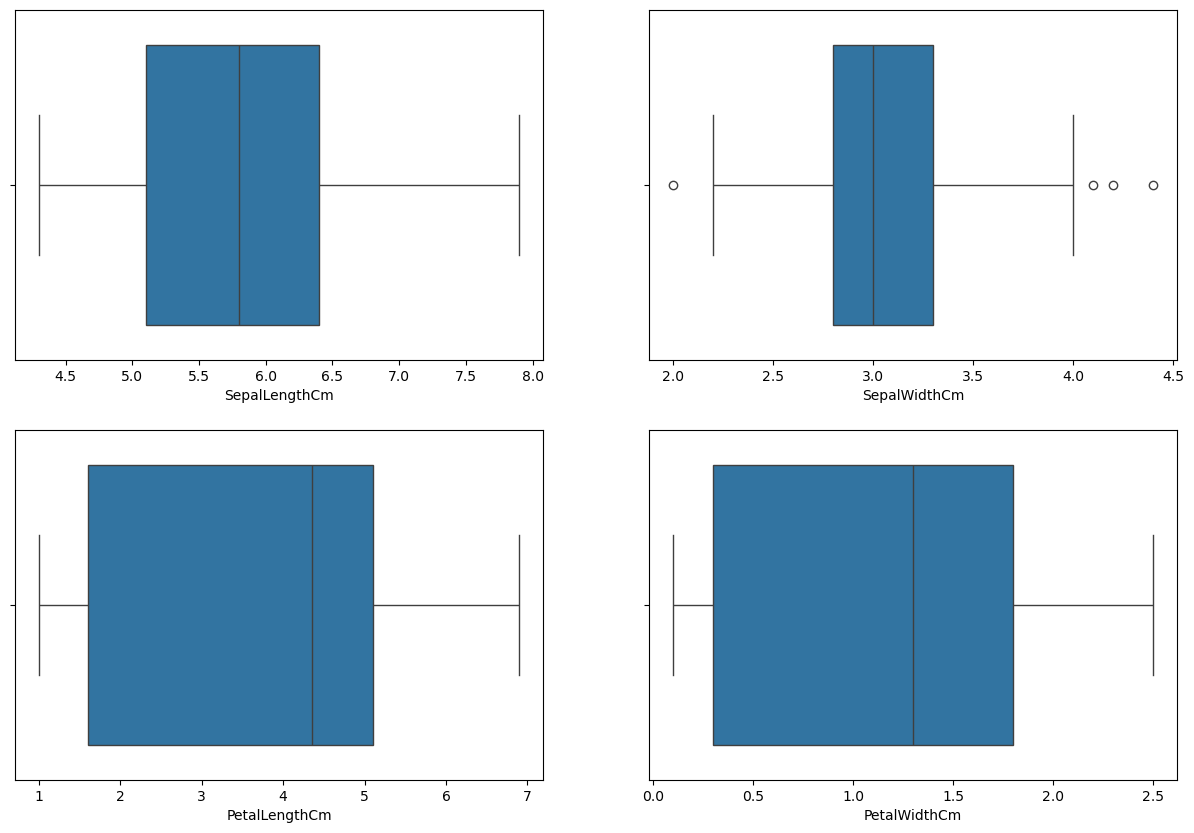

In [19]:
plt.figure(figsize=(15,10),facecolor='white')
pltno=1
for column in df:
    if pltno<=4:
        ax=plt.subplot(2,2,pltno)
        sns.boxplot(data=df, x=df[column])
        pltno+=1

In [20]:
q1=df['SepalWidthCm'].quantile(0.25)
q3=df['SepalWidthCm'].quantile(0.75)
iqr=q3-q1

ll=q1-1.5*iqr
ul=q3+1.5*iqr

outliers=((df['SepalWidthCm']<ll)|(df['SepalWidthCm']>ul))
outper=outliers.mean()
outnum=outliers.sum()

print(outper)
print(outnum)

0.02666666666666667
4


In [21]:
df.loc[df['SepalWidthCm']<ll,'SepalWidthCm']=df['SepalWidthCm'].median()
df.loc[df['SepalWidthCm']>ul,'SepalWidthCm']=df['SepalWidthCm'].median()


## SCALING

In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
scaling=StandardScaler()

In [25]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]=scaling.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [27]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.194185,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.092652,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.422083,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.164715,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.451553,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.092652,0.819624,1.447956,Iris-virginica
146,0.553333,-1.379490,0.705893,0.922064,Iris-virginica
147,0.795669,-0.092652,0.819624,1.053537,Iris-virginica
148,0.432165,0.936818,0.933356,1.447956,Iris-virginica


In [28]:
x=df.drop('Species',axis=1)

In [29]:
y=df['Species']

In [30]:
from sklearn.cluster import KMeans

In [31]:
model=KMeans(n_clusters=3,random_state=20)

In [32]:
model.fit(x)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=20)

In [33]:
model.cluster_centers_

array([[-0.01725724, -0.89283127,  0.37193617,  0.3029456 ],
       [ 1.14840215,  0.21046943,  0.99527619,  1.02432052],
       [-1.01457897,  0.79269192, -1.30487835, -1.25512862]])

In [34]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

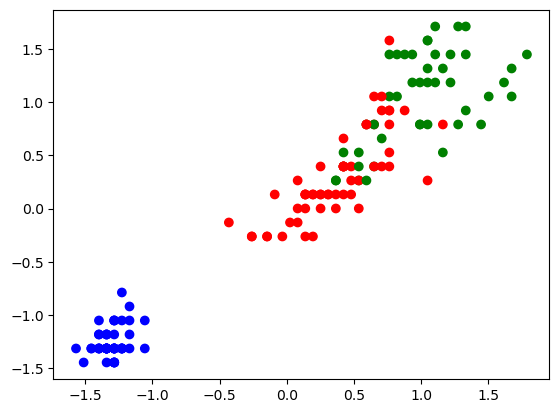

In [35]:
color_schema=np.array(['red','green','blue','black'])
plt.scatter(df.PetalLengthCm,df.PetalWidthCm,color=color_schema[model.labels_])

In [36]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.45874860218803254

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

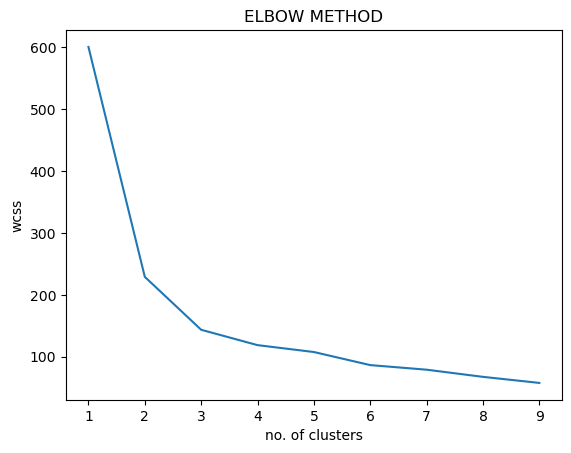

In [81]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=40)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()